### Home Credit Default Risk Competition

- заказчик - небанковская кредитная организация, операции в том числе в России
- разработка методики выдачи кредита людям без кредитной истории и рейтинга (такие клиенты часто идут к мошенникам)
- Большое количество признаков (122), много нечисловых, 307 тысяч записей
- Задача классификации (1: сложности с платежами, 0: нет сложностей), но нужно считать вероятность
- 6 таблиц доп. данных (данные по кредитному бюро, балансу кредитной карты и предудущим кредитам) (эти таблицы мало кто использует)
- задача похожа на стандартные, высокий приз $70к -> участвует 2 тыс. команд - битва за доли процентов
- много кернелов с очень хорошим EDA

https://www.kaggle.com/c/home-credit-default-risk

#### интересные <a href="https://www.kaggle.com/c/home-credit-default-risk/kernels?sortBy=voteCount&group=everyone&pageSize=20&competitionId=9120">кернелы</a>

- <a href="https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction">Start Here: A Gentle Introduction</a>
- <a href="https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772">HomeCreditRisk: Extensive EDA + Baseline [0.772]</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# установка показа любого кличества столбцов

pd.set_option('display.max_columns', None)

In [3]:
data = './data/application_train.csv'
df = pd.read_csv(data,)

In [37]:
print('data shape', df.shape)

data shape (307511, 122)


In [4]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
df.info(max_cols=130)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

данные неполные, как видно по анализу столбцов

In [6]:
#информация по типам столбцов

df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

кол-во уникальных клссов для каждого столбца типа объект - от 2 до 58

In [45]:
df.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",
5,application_{train|test}.csv,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,
6   CODE_GENDER,Gender of the client,
7   FLAG_OWN_CAR,Flag if the client owns a car,
8   FLAG_OWN_REALTY,Flag if client owns a house or flat,
9   CNT_CHILDREN,Number of children the client has,
10   AMT_INCOME_TOTAL,Income of the client,
11   AMT_CREDIT,Credit amount of the loan,
12   AMT_ANNUITY,Loan annuity,
13   AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,
14   NAME_TYPE_SUITE,Who was accompanying client when he was applying for the loan,
15   NAME_INCOME_TYPE,"Clients income type (businessman, working, maternity leave,)",
16   NAME_EDUCATION_TYPE,Level of highest education the client achieved,
17   NAME_FAMILY_STATUS,Family status of the client,
18   NAME_HOUSING_TYPE,"What is the housing situation of the client (renting, living with parents, ...)",
19   REGION_POPULATION_RELATIVE,Normalized population of region where client lives (higher number means the client lives in more populated region),normalized 
20   DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
21   DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
22   DAYS_REGISTRATION,How many days before the application did client change his registration,time only relative to the application
23   DAYS_ID_PUBLISH,How many days before the application did client change the identity document with which he applied for the loan,time only relative to the application
24   OWN_CAR_AGE,Age of client's car,
25   FLAG_MOBIL,"Did client provide mobile phone (1=YES, 0=NO)",
26   FLAG_EMP_PHONE,"Did client provide work phone (1=YES, 0=NO)",
27   FLAG_WORK_PHONE,"Did client provide home phone (1=YES, 0=NO)",
28   FLAG_CONT_MOBILE,"Was mobile phone reachable (1=YES, 0=NO)",
29   FLAG_PHONE,"Did client provide home phone (1=YES, 0=NO)",
30   FLAG_EMAIL,"Did client provide email (1=YES, 0=NO)",
31   OCCUPATION_TYPE,What kind of occupation does the client have,
32   CNT_FAM_MEMBERS,How many family members does client have,
33   REGION_RATING_CLIENT,"Our rating of the region where client lives (1,2,3)",
34   REGION_RATING_CLIENT_W_CITY,"Our rating of the region where client lives with taking city into account (1,2,3)",
35   WEEKDAY_APPR_PROCESS_START,On which day of the week did the client apply for the loan,
36   HOUR_APPR_PROCESS_START,Approximately at what hour did the client apply for the loan,rounded
37   REG_REGION_NOT_LIVE_REGION,"Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)",
38   REG_REGION_NOT_WORK_REGION,"Flag if client's permanent address does not match work address (1=different, 0=same, at region level)",
39   LIVE_REGION_NOT_WORK_REGION,"Flag if client's contact address does not match work address (1=different, 0=same, at region level)",
40   REG_CITY_NOT_LIVE_CITY,"Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)",
41   REG_CITY_NOT_WORK_CITY,"Flag if client's permanent address does not match work address (1=different, 0=same, at city level)",
42   LIVE_CITY_NOT_WORK_CITY,"Flag if client's contact address does not match work address (1=different, 0=same, at city level)",
43   ORGANIZATION_TYPE,Type of organization where client works,
44   EXT_SOURCE_1,Normalized score from external data source,normalized
45   EXT_SOURCE_2,Normalized score from external data source,normalized
46   EXT_SOURCE_3,Normalized score from external data source,normalized
47   APARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
48   BASEMENTAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
49   YEARS_BEGINEXPLUATATION_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
50   YEARS_BUILD_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
51   COMMONAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
52   ELEVATORS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
53   ENTRANCES_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
54   FLOORSMAX_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
55   FLOORSMIN_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
56   LANDAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
57   LIVINGAPARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
58   LIVINGAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
59   NONLIVINGAPARTMENTS_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
60   NONLIVINGAREA_AVG,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
61   APARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
62   BASEMENTAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
63   YEARS_BEGINEXPLUATATION_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
64   YEARS_BUILD_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
65   COMMONAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
66   ELEVATORS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
67   ENTRANCES_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
68   FLOORSMAX_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
69   FLOORSMIN_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
70   LANDAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
71   LIVINGAPARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
72   LIVINGAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
73   NONLIVINGAPARTMENTS_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
74   NONLIVINGAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
75   APARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
76   BASEMENTAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
77   YEARS_BEGINEXPLUATATION_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
78   YEARS_BUILD_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
79   COMMONAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
80   ELEVATORS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
81   ENTRANCES_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
82   FLOORSMAX_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
83   FLOORSMIN_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
84   LANDAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
85   LIVINGAPARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
86   LIVINGAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
87   NONLIVINGAPARTMENTS_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
88   NONLIVINGAREA_MEDI,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
89   FONDKAPREMONT_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
90   HOUSETYPE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
91   TOTALAREA_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
92   WALLSMATERIAL_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
93   EMERGENCYSTATE_MODE,"Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor",normalized
94   OBS_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 30 DPD (days past due) default,
95   DEF_30_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 30 DPD (days past due) ,
96   OBS_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings with observable 60 DPD (days past due) default,
97   DEF_60_CNT_SOCIAL_CIRCLE,How many observation of client's social surroundings defaulted on 60 (days past due) DPD,
98   DAYS_LAST_PHONE_CHANGE,How many days before application did client change phone,
99   FLAG_DOCUMENT_2,Did client provide document 2,
100   FLAG_DOCUMENT_3,Did client provide document 3,
101   FLAG_DOCUMENT_4,Did client provide document 4,
102   FLAG_DOCUMENT_5,Did client provide document 5,
103   FLAG_DOCUMENT_6,Did client provide document 6,
104   FLAG_DOCUMENT_7,Did client provide document 7,
105   FLAG_DOCUMENT_8,Did client provide document 8,
106   FLAG_DOCUMENT_9,Did client provide document 9,
107   FLAG_DOCUMENT_10,Did client provide document 10,
108   FLAG_DOCUMENT_11,Did client provide document 11,
109   FLAG_DOCUMENT_12,Did client provide document 12,
110   FLAG_DOCUMENT_13,Did client provide document 13,
111   FLAG_DOCUMENT_14,Did client provide document 14,
112   FLAG_DOCUMENT_15,Did client provide document 15,
113   FLAG_DOCUMENT_16,Did client provide document 16,
114   FLAG_DOCUMENT_17,Did client provide document 17,
115   FLAG_DOCUMENT_18,Did client provide document 18,
116   FLAG_DOCUMENT_19,Did client provide document 19,
117   FLAG_DOCUMENT_20,Did client provide document 20,
118   FLAG_DOCUMENT_21,Did client provide document 21,
119   AMT_REQ_CREDIT_BUREAU_HOUR,Number of enquiries to Credit Bureau about the client one hour before application,
120   AMT_REQ_CREDIT_BUREAU_DAY,Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application),
121   AMT_REQ_CREDIT_BUREAU_WEEK,Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application),
122   AMT_REQ_CREDIT_BUREAU_MON,Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application),
123   AMT_REQ_CREDIT_BUREAU_QRT,Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application),
124   AMT_REQ_CREDIT_BUREAU_YEAR,Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application),

#### расчет доли проблемных кредитов ( 8%, классы несбалансированы )

(array([ 282686.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,   24825.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

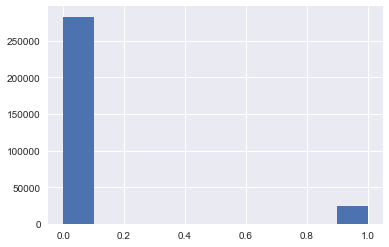

In [7]:
plt.hist(df.TARGET)

In [8]:
df.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [9]:
24825 / (282686+24825) *100

8.072881945686495

#### рассчитаем важность фич по корреляционной матрице

In [10]:
df_corr = df.corr()

In [11]:
df_corr['TARGET'].sort_values()[:10]

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64

In [12]:
df_corr['TARGET'].sort_values()[-10:]

FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

#### выделим целевой столбец

In [13]:
df_target = df.TARGET

#### выбор наиболее значащих столбцов, заполнение NaN нулями 

In [14]:
df_data = df[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
              'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 
              'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY']]

In [15]:
df_data = df_data.fillna(value=0)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 10 columns):
EXT_SOURCE_3                   307511 non-null float64
EXT_SOURCE_2                   307511 non-null float64
EXT_SOURCE_1                   307511 non-null float64
DAYS_BIRTH                     307511 non-null int64
REGION_RATING_CLIENT_W_CITY    307511 non-null int64
REGION_RATING_CLIENT           307511 non-null int64
DAYS_LAST_PHONE_CHANGE         307511 non-null float64
DAYS_ID_PUBLISH                307511 non-null int64
REG_CITY_NOT_WORK_CITY         307511 non-null int64
REG_CITY_NOT_WORK_CITY         307511 non-null int64
dtypes: float64(4), int64(6)
memory usage: 23.5 MB


### тренировка случайного леса, на тестовую выборку отведено 30%

In [16]:
# Import necessary modules
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_data
y = df_target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier

#build model
clf = RandomForestClassifier()

#fit
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### итоговая точность на 10 деревьях -  91,7%

In [18]:
# Print the accuracy
print(clf.score(X_test, y_test))

0.917120124873


#### итоговая точность на 100 деревьях -  91,9%

In [19]:
#build model
clf100 = RandomForestClassifier(n_estimators=100)

#fit
clf100.fit(X_train, y_train)

# Print the accuracy
print(clf100.score(X_test, y_test))

0.919060420144


#### тренировка классификатора на полной тестовой выборке

In [20]:
clf_full = RandomForestClassifier()
clf_full.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
# здравый смысл - применим на себя же
print(clf_full.score(X, y))

0.985395644383


In [22]:
print(clf_full.feature_importances_)

[ 0.14194063  0.20657357  0.08680663  0.18848742  0.01229644  0.01180402
  0.15862736  0.18115647  0.00612623  0.00618123]


ниаболее важные фичи:
'EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 

#### классификатор clf_full натренирован, загружаем тестовую выборку

In [23]:
test_data = './data/application_test.csv'
df_test = pd.read_csv(test_data,)

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [25]:
Xtest = df_test[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY',
              'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 
              'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY']]

In [26]:
Xtest = Xtest.fillna(value=0)

In [27]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 10 columns):
EXT_SOURCE_3                   48744 non-null float64
EXT_SOURCE_2                   48744 non-null float64
EXT_SOURCE_1                   48744 non-null float64
DAYS_BIRTH                     48744 non-null int64
REGION_RATING_CLIENT_W_CITY    48744 non-null int64
REGION_RATING_CLIENT           48744 non-null int64
DAYS_LAST_PHONE_CHANGE         48744 non-null float64
DAYS_ID_PUBLISH                48744 non-null int64
REG_CITY_NOT_WORK_CITY         48744 non-null int64
REG_CITY_NOT_WORK_CITY         48744 non-null int64
dtypes: float64(4), int64(6)
memory usage: 3.7 MB


In [28]:
#отдельно метки

Xtest_labels = df_test[['SK_ID_CURR']]
Xtest_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 1 columns):
SK_ID_CURR    48744 non-null int64
dtypes: int64(1)
memory usage: 380.9 KB


итого: Xtext - тестовая выборка X, Xtest_labels - ID клиента для выгрузки

In [29]:
ytest = clf_full.predict(Xtest)

In [30]:
sum(ytest==1) / len(ytest) * 100

0.47800754964713604

итого по тестовой выборке количество плохизх клиентов 0.49%. Выгрузим результат без вероятности

In [31]:
submission = pd.DataFrame({
    'SK_ID_CURR': Xtest_labels.SK_ID_CURR,
    'TARGET': ytest
})

(array([ 48511.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    233.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

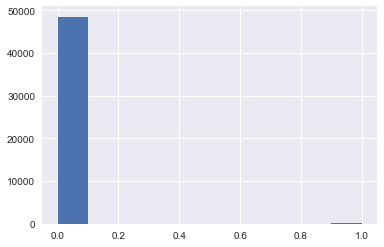

In [32]:
plt.hist(submission.TARGET)

In [92]:
submission.to_csv('submission3.csv', index=False)

#### результат - 0,512 score, 1970 место (из 2060, lol)

### Рассчитаем вероятность

In [33]:
probs = clf_full.predict_proba(Xtest)

(array([  2.50890000e+04,   1.32970000e+04,   5.99700000e+03,
          2.59200000e+03,   0.00000000e+00,   1.08900000e+03,
          4.47000000e+02,   1.63000000e+02,   5.70000000e+01,
          1.30000000e+01]),
 array([ 0.  ,  0.08,  0.16,  0.24,  0.32,  0.4 ,  0.48,  0.56,  0.64,
         0.72,  0.8 ]),
 <a list of 10 Patch objects>)

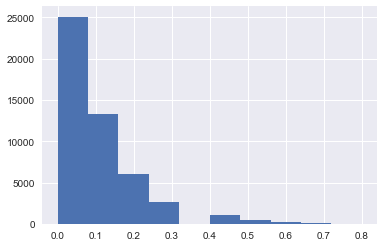

In [34]:
plt.hist(probs[:, 1])

In [101]:
submission = pd.DataFrame({
    'SK_ID_CURR': Xtest_labels.SK_ID_CURR,
    'TARGET': [row[1] for row in probs]
})

In [35]:
submission.head()

,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


In [103]:
submission.to_csv('submission4.csv', index=False)

#### результат - 0,607 score, 1917 место (подъем на 53 места), лучший  на дату загрузки - 0,802

# Подход 2: Кодирование категориальных признаков, тренировка модели

In [2]:
app_train = pd.read_csv('./data/application_train.csv',)
app_test = pd.read_csv('./data/application_test.csv')

как было рассчитано, кол-во уникальных клссов для каждого столбца типа объект - от 2 до 58

Предлагается применить One-hot-encoder, несмотря на особенности

In [3]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 246)
Testing Features shape:  (48744, 242)


количество столбцов не совпадает так как количество вариантов в столбцах выборок не равное. Требуется выравнивание - убрать из тренировочной выборки столбцы, которых нет в тестовой. Это делает метод align, axis=1 (для столбцов)

In [4]:
#сохраним лейблы
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 242)


In [5]:
# Add target back in to the data
app_train['TARGET'] = train_labels

In [6]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations: \n', correlations.tail(15))
print('\nMost Negative Correlations: \n', correlations.head(15))

Most Positive Correlations: 
 DAYS_REGISTRATION                                    0.041975
OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negat

из имеющихся данных возраст имеет самую сильную корреляцию. так как по дукументации возраст изменяется в отрицательных днях (до взятия кредита), корреляция выглядит положительной, хотя на самом деле она отрицательная. Приведем возраст к положительной величине

In [6]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.078239308309827088

Гистограмма по возрасту

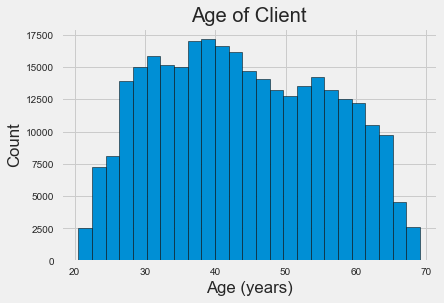

In [7]:
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

KDE - kernel dencity estimation - распределение наблюдений по целевой величине

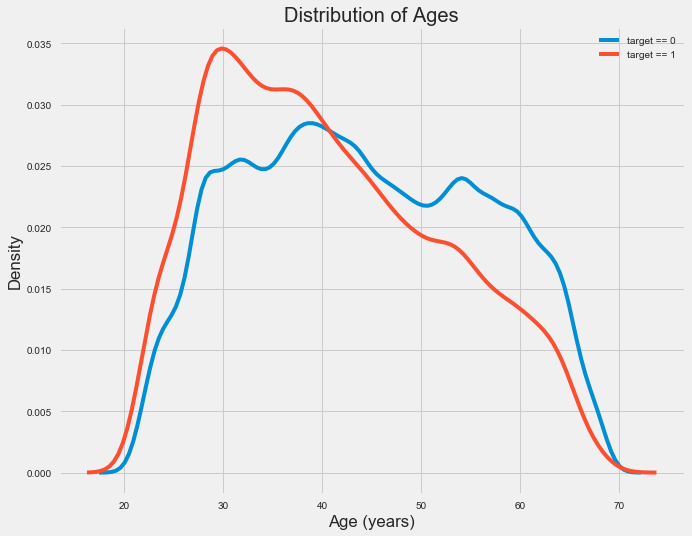

In [8]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Видно, что на высоком возрасте количество беспроблемных кредитов больше. Вывод лля банка - молодые клиенты требуют повышенного внимания (хотя и не должны быть дискриминированы)

EXT_SOURCE имеют наивысшую негативную корреляцию. Что это - неясно, вероятно агрегированный кредитный рейтинг из бюро

In [9]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


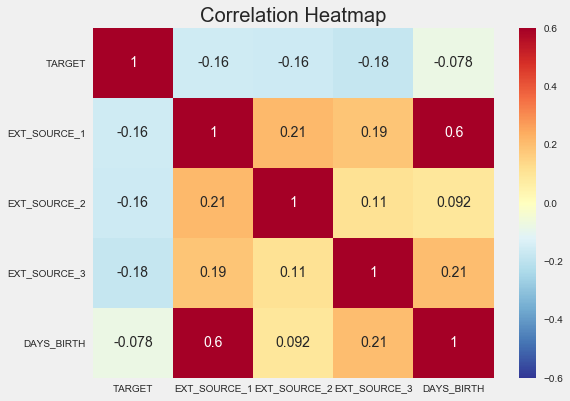

In [10]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Корреляция всех показателей с целевым негативная, то есть чем они выше, тем меньше проблем с кредитом

D:\python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
D:\python\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


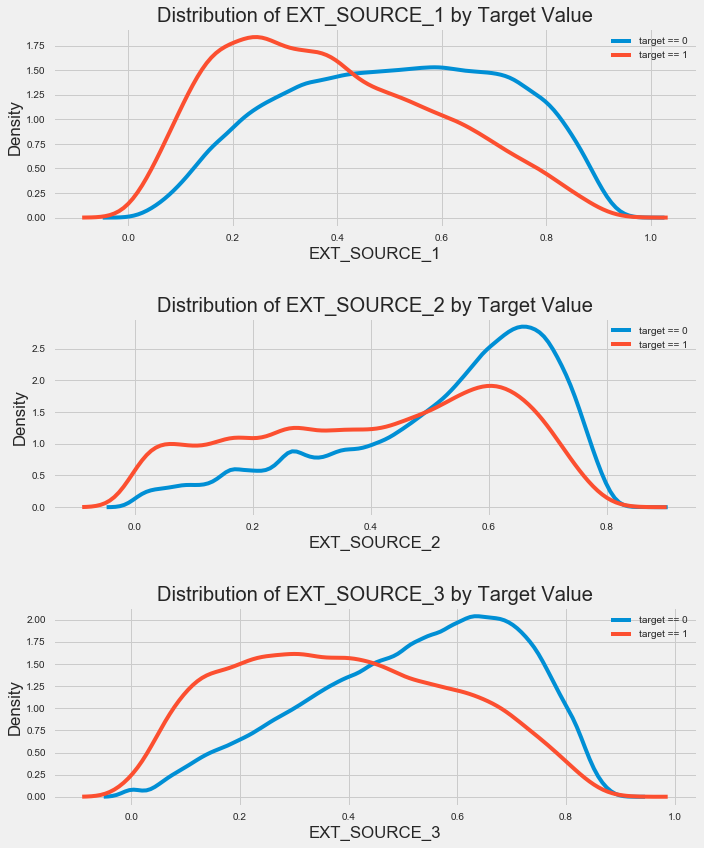

In [11]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

KDE показывает тот же эффект (хотя объективно корреляция - низкая)

### Fearure Engineering

Polynomial features - добавление фич, которые представляют собой степень имеющихся или их произведение. Создаим полиномиальные признаки для наиболее значимых:


класс PolynomialFeatures именно это и делает (плюс Imputer для заполнения NAN)

In [12]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop('TARGET', axis=1)

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

In [13]:
# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


присвоим подходящие имена

In [14]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

проверим корреляцию полученных экстра фич

In [15]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


некоторые фичи теперь имеют более высокую кореляцию, чем исходные. При тренировке моделей можно использовать разные их комбинации

In [16]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 277)
Testing data with polynomial features shape:   (48744, 277)


### Логистическая регрессия

нормализация, заполнение недостающих значений медианными

In [17]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(labels = ['TARGET'], axis=1)
else:
    train = app_train.copy()
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 242)
Testing data shape:  (48744, 242)


Обучение регрессии (автор предлагает понизить параметр оверфиттинга)

In [85]:
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_labels)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [86]:
# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [87]:
# Submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.087954
1,100005,0.163151
2,100013,0.109923
3,100028,0.077124
4,100038,0.151694


In [88]:
# Save the submission to a csv file
submit.to_csv('log_reg_baseline.csv', index = False)

#### результат - 0.673, поднялся на 78 позиции

### Случайный лес

In [89]:
from sklearn.ensemble import RandomForestClassifier

# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50)

In [90]:
# Train on the training data
random_forest.fit(train, train_labels)

# Make predictions on the test data
predictions = random_forest.predict_proba(test)[:, 1]

In [91]:
# Make a submission dataframe
submit = app_test[['SK_ID_CURR']]
submit['TARGET'] = predictions

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### результат - 0.683, поднялся на 24 позиции

Важность фич

In [92]:
# Function to calculate and show feature importances
def show_feature_importances(model, features):
    plt.figure(figsize = (12, 8))
    # Dataframe of feature importances sorted from most to least
    results = pd.DataFrame({'feature': features, 'importance': model.feature_importances_})
    results = results.sort_values('importance', ascending = False)
    
    # Display
    print(results.head(10))
    print('\nNumber of features with importance greater than 0.01 = ', np.sum(results['importance'] > 0.01))
    
    # Plot of feature importances as horizontal bar chart
    results.head(20).plot(x = 'feature', y = 'importance', kind = 'barh',
                     color = 'red', edgecolor = 'k', title = 'Feature Importances');
    return results

                   feature  importance
29            EXT_SOURCE_2    0.049509
30            EXT_SOURCE_3    0.045951
7               DAYS_BIRTH    0.032017
10         DAYS_ID_PUBLISH    0.031851
9        DAYS_REGISTRATION    0.031326
0               SK_ID_CURR    0.029972
4              AMT_ANNUITY    0.028993
8            DAYS_EMPLOYED    0.028046
78  DAYS_LAST_PHONE_CHANGE    0.027916
3               AMT_CREDIT    0.027188

Number of features with importance greater than 0.01 =  19


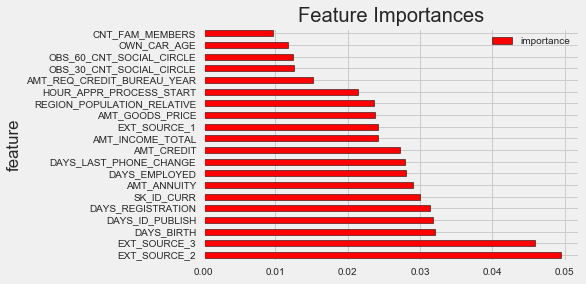

In [93]:
# Show the feature importances for the default features
feature_importances = show_feature_importances(random_forest, features)

## градиентный бустинг

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from lightgbm import LGBMClassifier
import gc

# Format the training and testing data 
train = np.array(app_train.drop(labels = 'TARGET', axis=1))
test = np.array(app_test)

train_labels = np.array(train_labels).reshape((-1, ))

# 10 fold cross validation
folds = KFold(n_splits=5, shuffle=True, random_state=50)

# Validation and test predictions
valid_preds = np.zeros(train.shape[0])
test_preds = np.zeros(test.shape[0])

# Iterate through each fold
for n_fold, (train_indices, valid_indices) in enumerate(folds.split(train)):
    # Training data for the fold
    train_fold, train_fold_labels = train[train_indices, :], train_labels[train_indices]
    
    # Validation data for the fold
    valid_fold, valid_fold_labels = train[valid_indices, :], train_labels[valid_indices]
    
    # LightGBM classifier with hyperparameters
    clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.1,
        subsample=.8,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2
    )
    
    # Fit on the training data, evaluate on the validation data
    clf.fit(train_fold, train_fold_labels, 
            eval_set= [(train_fold, train_fold_labels), (valid_fold, valid_fold_labels)], 
            eval_metric='auc', early_stopping_rounds=100, verbose = False
           )
    
    # Validation preditions
    valid_preds[valid_indices] = clf.predict_proba(valid_fold, num_iteration=clf.best_iteration_)[:, 1]
    
    # Testing predictions
    test_preds += clf.predict_proba(test, num_iteration=clf.best_iteration_)[:, 1] / folds.n_splits
    
    # Display the performance for the current fold
    print('Fold %d AUC : %0.6f' % (n_fold + 1, roc_auc_score(valid_fold_labels, valid_preds[valid_indices])))
    
    # Delete variables to free up memory
    del clf, train_fold, train_fold_labels, valid_fold, valid_fold_labels
    gc.collect()
    

# Make a submission dataframe
submission = app_test[['SK_ID_CURR']]
submission['TARGET'] = test_preds

# Save the submission file
submission.to_csv("light_gbm_baseline.csv", index=False)

Fold 1 AUC : 0.754766
Fold 2 AUC : 0.758703
Fold 3 AUC : 0.764075
Fold 4 AUC : 0.757183
Fold 5 AUC : 0.758090


D:\python\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### результат - 0.735, поднялся на 230 позиций